<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv', usecols=lambda x: x != 'Unnamed: 0')

### Escenario del proyecto.  

Usted es un Científico de Datos en una agencia de vivienda en Boston MA, se le ha dado acceso a un conjunto de datos previos sobre los precios de la vivienda derivados del Servicio de Censos de EE.UU. para presentar ideas a la alta dirección. Basándose en su experiencia en Estadística, ¿qué información puede proporcionarles para ayudarles a tomar una decisión informada? A la alta dirección le gustaría tener alguna idea de lo siguiente.

- ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

- ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

- ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

- ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

Utilizando los gráficos y cuadros apropiados, genere estadísticas básicas y visualizaciones que crea que serán útiles para los altos directivos para darles una visión importante dada la pregunta que se están planteando; en sus gráficos, incluya una explicación de cada estadística. 

### Lineas de accion.

- Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)

- Proporcione un diagrama de barras para la variable "río Charles"

- Proporcione un boxplot para la variable MEDV frente a la variable EDAD. (Discretice la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)

- Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?

- Cree un histograma para la variable proporción de alumnos por profesor



### Variables del conjunto de datos.

**- CRIM - tasa de delincuencia per cápita por ciudad**

**- ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.**

**- INDUS - proporción de acres comerciales no minoristas por localidad.**

**- CHAS - variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)**

**- NOX - concentración de óxidos nítricos (partes por 10 millones)**

**- RM - número medio de habitaciones por vivienda**

**- EDAD - proporción de unidades ocupadas por sus propietarios construidas antes de 1940**

**- DIS - distancias ponderadas a cinco centros de empleo de Boston**

**- RAD - índice de accesibilidad a las autopistas radiales**

**- IMPUESTO - tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares**

**- PTRATIO - proporción alumnos-profesor por ciudad**

**- LSTAT - % más bajo de la población**

**- MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares**



### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Caracteristicas del DATASET

- No contiene valores nulos
- Todas las variables son numericas del tipo float64
- Posee 506 registros

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Visualización de las principales variables a analizar en el proyecto

##### Valor medio de las viviendas ocupadas en M$ (boxplots)

- El valor medio de las viviendas esta alrededor de los 22.5 M$ 

<Axes: xlabel='MEDV'>

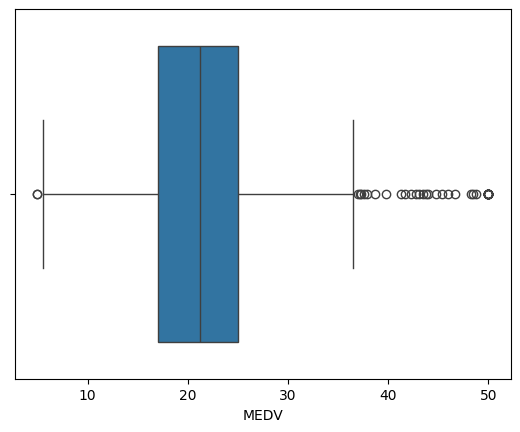

In [6]:
sns.boxplot(data=boston_df, x=boston_df['MEDV'])

In [7]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

##### Diagrama de barras para la variable "río Charles"

- Tractos colindantes con el Rio Charles 471
- No colindantes 35

In [8]:
boston_df['Colinda_Rio'] = boston_df['CHAS'].apply(lambda x: 'yes' if x == 1 else 'no')

In [9]:
boston_df['Colinda_Rio'].value_counts()

Colinda_Rio
no     471
yes     35
Name: count, dtype: int64

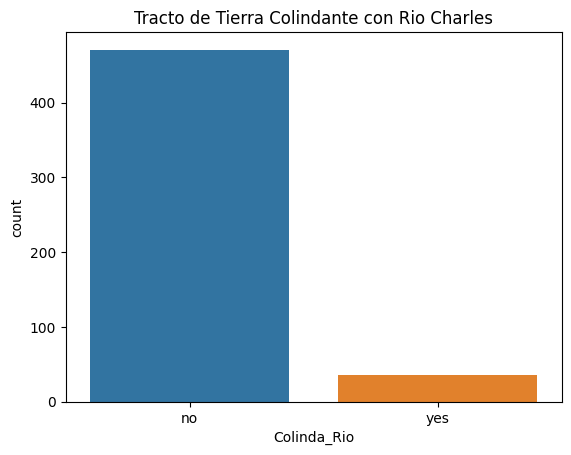

In [10]:
sns.countplot(data=boston_df, x='Colinda_Rio',hue='Colinda_Rio')
plt.title('Tracto de Tierra Colindante con Rio Charles')
plt.show()

##### ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

- El test de levene con un p-value de 0.003 indica la desigualdad de varianzas, vamos a considerar esto en la prueba ttest_ind para constrastar las hipotesis nula y alternativa.

- pvalue en la prueba ttest_ind es menor que 0,05, por lo que podemos rechazar la hipótesis nula, ya que se tiene evidencia significativa de que existe una diferencia entre los valores medios de las casas que estan cerca del Rio Charles y las que no.

In [11]:
### Vamos a comprobar la igualdad de varianzas
scipy.stats.levene(boston_df[boston_df['Colinda_Rio']== 'yes']['MEDV'],
                   boston_df[boston_df['Colinda_Rio'] == 'no']['MEDV'], center='mean')


LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['Colinda_Rio']== 'yes']['MEDV'],
                   boston_df[boston_df['Colinda_Rio'] == 'no']['MEDV'], equal_var='False')

TtestResult(statistic=np.float64(3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

##### Boxplot para la variable MEDV frente a la variable EDAD

- Discretizacion de la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más

In [13]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']='<= 35'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='entre 35 y 70'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='>= 70'

In [14]:
boston_df['age_group'].value_counts()

age_group
>= 70            287
entre 35 y 70    128
<= 35             91
Name: count, dtype: int64

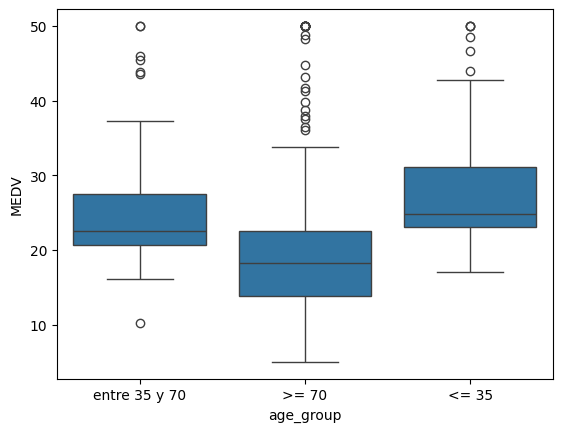

In [15]:
sns.boxplot(data=boston_df, y='MEDV', x='age_group')
plt.show()

##### ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

- Dado que el p-valor es significativamente menor que 0.05, podemos rechazar la hipótesis nula de que todas las medias de los grupos son iguales. Esto sugiere que al menos uno de los grupos tiene una media significativamente diferente de los demás.

In [16]:
# Vamos aplicar ANOVA, para determinar si el valor medio de las casas esta influenciado por la proporcion de unidades ocupadas 
# por sus propietarios antes de 1940 en los rangos establecidos previamente en la variable age_group

medv_35 = boston_df[boston_df['age_group'] == '<= 35']['MEDV']
medv_35_70 = boston_df[boston_df['age_group'] == 'entre 35 y 70']['MEDV']
medv_70 = boston_df[boston_df['age_group'] == '>= 70']['MEDV']

In [17]:
# Vamos a revisar como son las varianzas de estos tres grupos

scipy.stats.levene(medv_35, medv_35_70,medv_70, center='mean')

# como pvalue es mayor a 0,05 se asume igual de varianzas en las siguientes pruebas.


LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(medv_35, medv_35_70, medv_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


##### Diagrama de dispersión de las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. 
- ¿Qué puede decir sobre la relación?

En el grafico de dispersión se nota una correlación positiva entre la concentración de óxido nítrico vs la proporción de los acres comerciales, más adelante se determinará estadísticamente el factor de correlación (R) para generar conclusiones más precisas.

In [19]:
boston_df['NOX'].max()

np.float64(0.871)

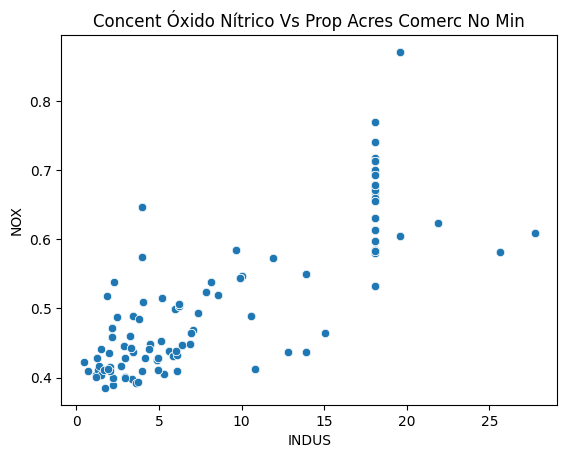

In [20]:
sns.scatterplot(data=boston_df, y='NOX', x='INDUS')
plt.title('Concent Óxido Nítrico Vs Prop Acres Comerc No Min')
plt.show()

##### ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

In [22]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

**Conclusion:** 
- statistic: El coeficiente de correlación de Pearson, que es de aproximadamente 0.7637, indica una correlación positiva de moderada a fuerte entre las variables INDUS y NOX.

- pvalue: El valor p, que es de aproximadamente 7.91e-98, indica que tenemos suficiente evidencia para rechazar la hipotesis nula, por lo que, la probabilidad de que la correlación observada sea debida al azar es extremadamente baja.

##### Histograma Proporción de Alumnos por Profesor

- El valor medio de la proporción de alumnos por profesor esta alrededor de 18.4, la mediana es de 19.0 y la moda 20.2
- El 75% de los valores corresponde a valores menores o iguales a 20.2
- Se observa un sesgo negativo en los datos (Media < Mediana < Moda)

In [29]:
boston_df['PTRATIO'].mode()

0    20.2
Name: PTRATIO, dtype: float64

In [28]:
boston_df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

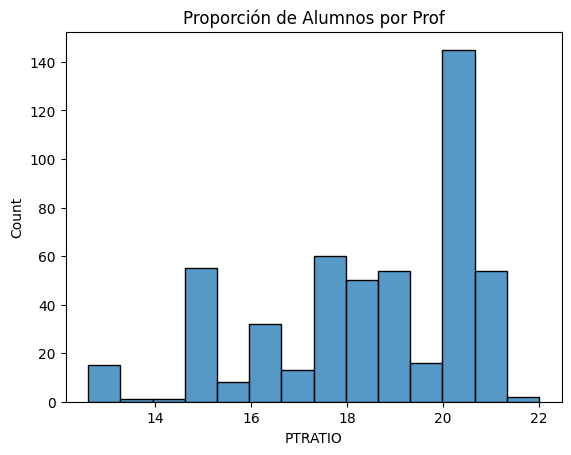

In [21]:
sns.histplot(data=boston_df,x='PTRATIO')
plt.title('Proporción de Alumnos por Prof')
plt.show()

##### ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

- El valor del estadístico, Prob (F-statistic), encontrado con el analísis de regresión es menor a α = 0.05, con lo cual podemos rechazar la hipotesis nula (valor promedio de las casas es el mismo, independientemente de la distancia a los 5 centros principales de trabajo en Boston).

- El coefciente de correlación entre las variables encontrado fue de 0.25, tampoco es un valor tan alto que permita inferir que el precio promedio de las viviendas depende unicamente de la distancia a los centros de trabajo, por lo cual, intervienen otras variables que ayudan a derterminar el valor de la propiedad. La ecuación de la recta sería la siguiente MEDV = 18.3901 + 1.0916*DIS , es decir, por cada incremento de 1 unidad de distancia en esta ecuación ocasiona un incremento de 1000$ aproxidamente en el valor de la vivienda. 

- Debemos profundizar mucho más para poder crear un modelo predictor de los valores de las viviendas, se podría considerar la ubicación de las propiedades en relación al rio, el tiempo de habitabilidad de las personas en las viviendas, entre otras.   

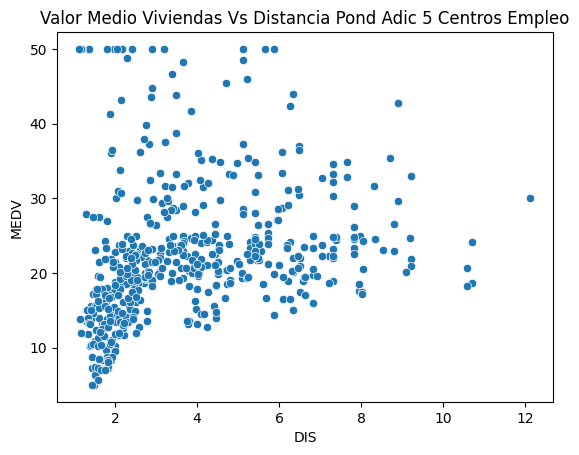

In [27]:
sns.scatterplot(data=boston_df, y='MEDV', x='DIS')
plt.title('Valor Medio Viviendas Vs Distancia Pond Adic 5 Centros Empleo')
plt.show()

In [24]:
X=boston_df['DIS']

y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        10:01:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""